In [ ]:
 import kagglehub

path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')

In [ ]:
df.sample(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5326,ham,What makes you most happy?,NaN,NaN,NaN
349,ham,Just checking in on you. Really do miss seeing...,NaN,NaN,NaN
4904,spam,Warner Village 83118 C Colin Farrell in SWAT t...,NaN,NaN,NaN
1484,ham,"Sorry, I'll call later",NaN,NaN,NaN
4436,ham,How come u got nothing to do?,NaN,NaN,NaN
2601,ham,Okie,NaN,NaN,NaN
566,ham,Oooh bed ridden ey? What are YOU thinking of?,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(7)

,v1,v2
5211,ham,It is only yesterday true true.
1125,spam,For taking part in our mobile survey yesterday...
3620,ham,That means from february to april i'll be gett...
4161,ham,How's it going? Got any exciting karaoke type ...
837,ham,"Sir, I have been late in paying rent for the p..."
5475,ham,Dhoni have luck to win some big title.so we wi...
2418,ham,"Madam,regret disturbance.might receive a refer..."


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(7)

,target,text
135,ham,I only haf msn. It's yijue@hotmail.com
1084,ham,For me the love should start with attraction.i...
652,ham,"Wait, do you know if wesleys in town? I bet sh..."
277,ham,"Awesome, I'll see you in a bit"
3527,spam,You are a å£1000 winner or Guaranteed Caller P...
2303,ham,Should I tell my friend not to come round til ...
1433,ham,You intrepid duo you! Have a great time and se...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

,0
target,0
text,0


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


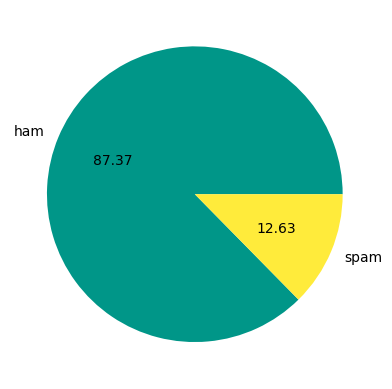

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],colors=['#009688', '#FFEB3B'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk
!pip install nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

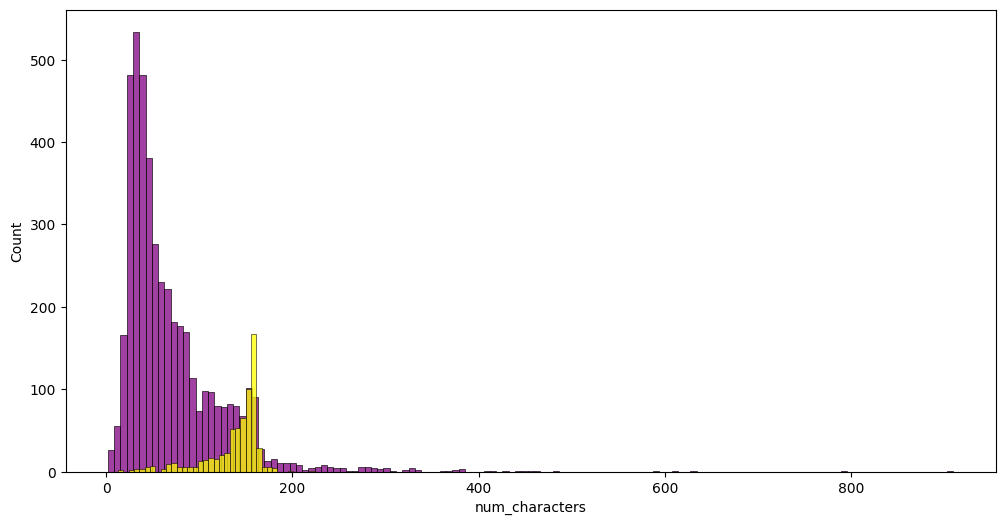

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'],color='purple')
sns.histplot(df[df['target'] == 1]['num_characters'],color='yellow')

<Axes: xlabel='num_words', ylabel='Count'>

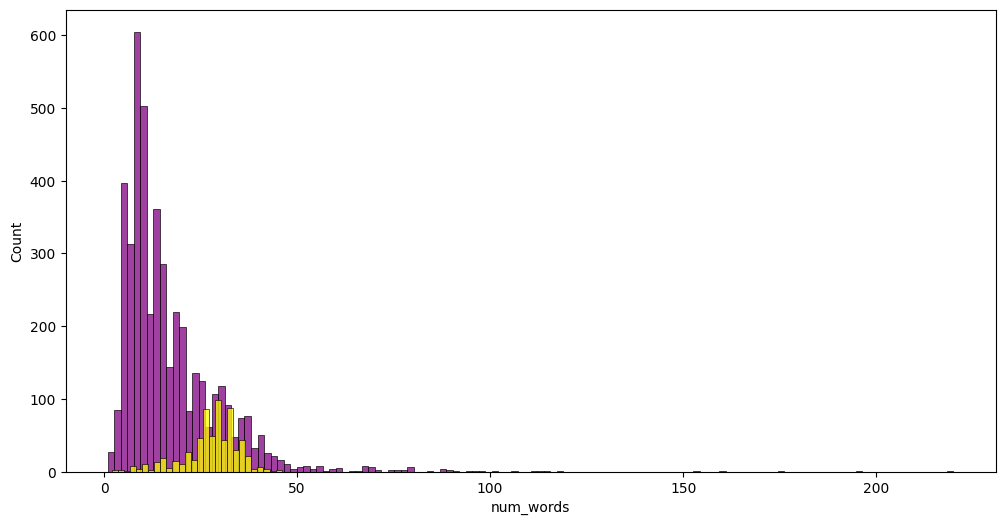

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'],color='purple')
sns.histplot(df[df['target'] == 1]['num_words'],color='yellow')

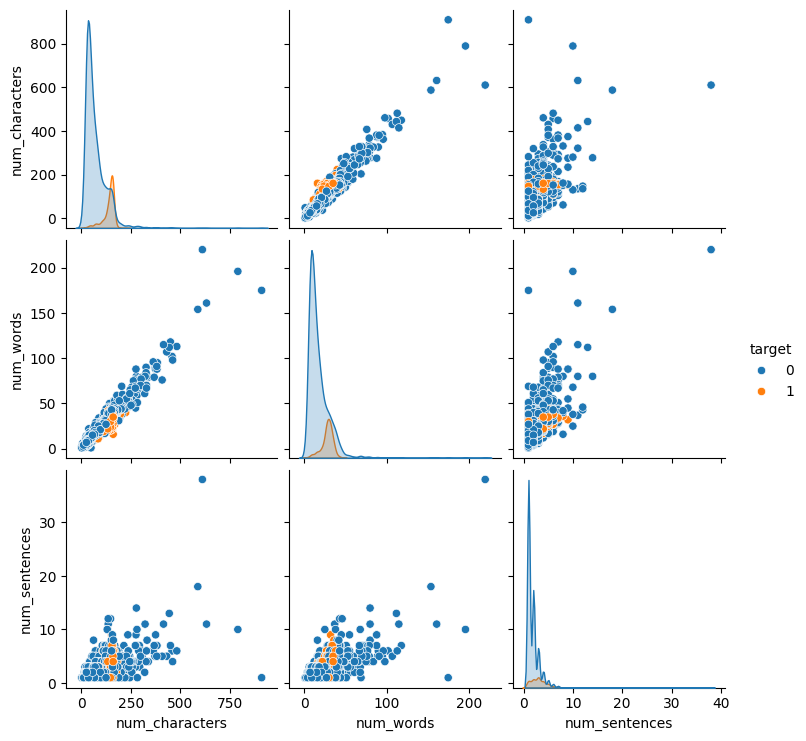

In [ ]:
sns.pairplot(df,hue='target')

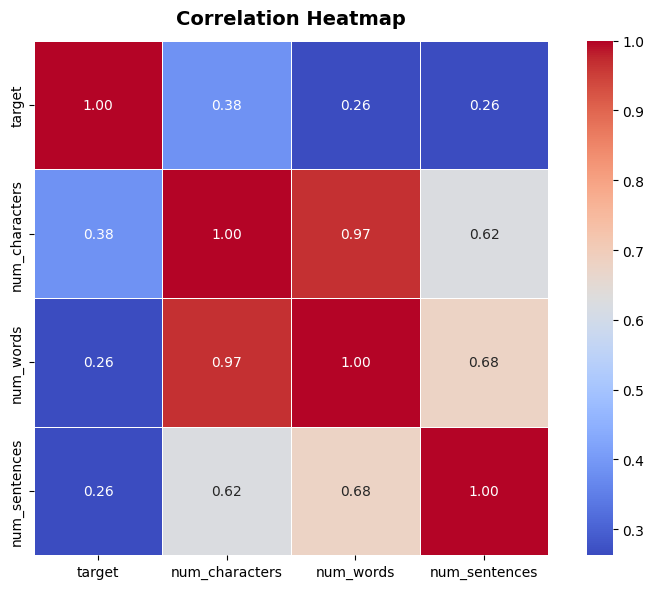

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.drop('text', axis=1).corr(numeric_only=True)

plt.figure(figsize=(8, 6))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    linecolor='white',
    square=True,
    annot_kws={"size": 10}
)

plt.title("Correlation Heatmap", fontsize=14, fontweight='bold', pad=12)
plt.tight_layout()
plt.show()


In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from typing import Any
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=7)

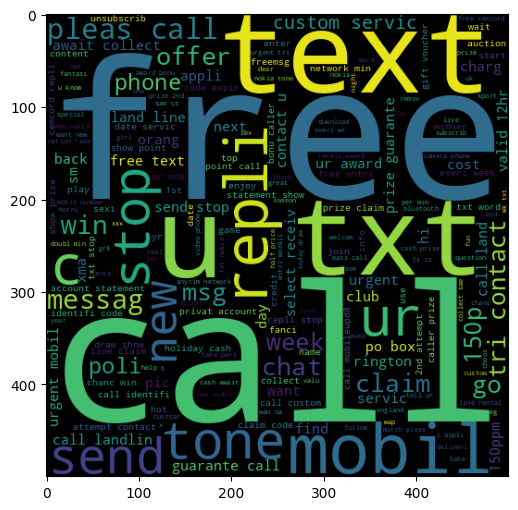

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

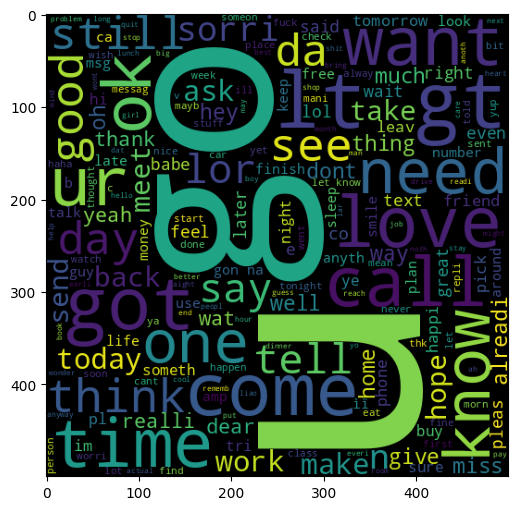

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

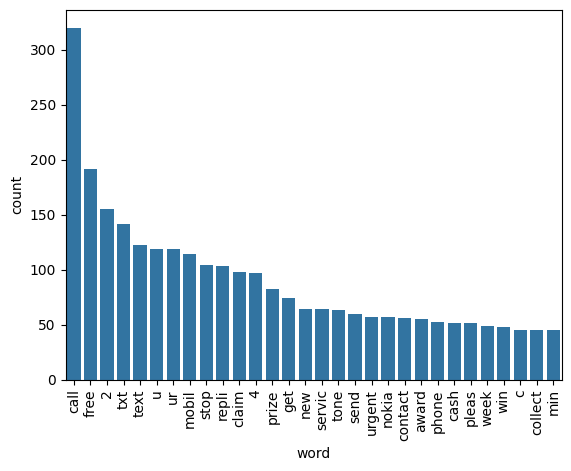

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

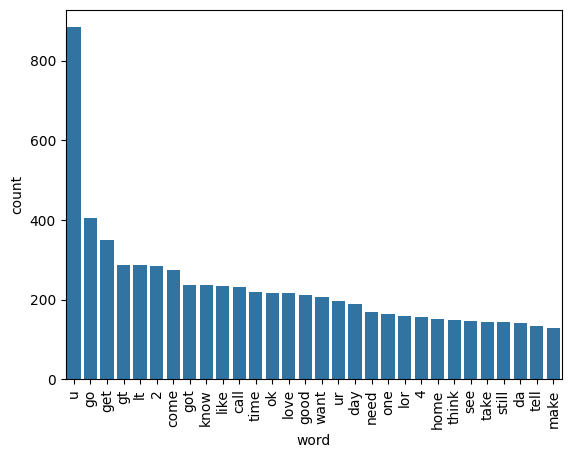

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

most_common_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=most_common_ham_words)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

0.8733075435203095


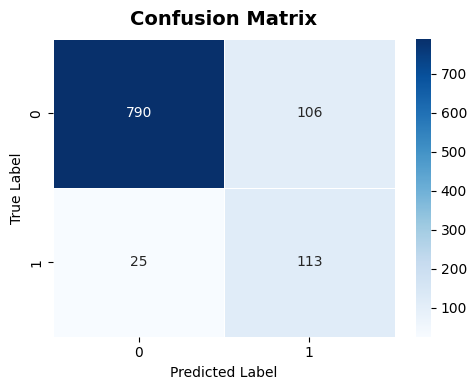

0.5159817351598174


In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='white')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix', fontsize=14, fontweight='bold', pad=10)
plt.tight_layout()
plt.show()
print(precision_score(y_test,y_pred1))

0.9709864603481625


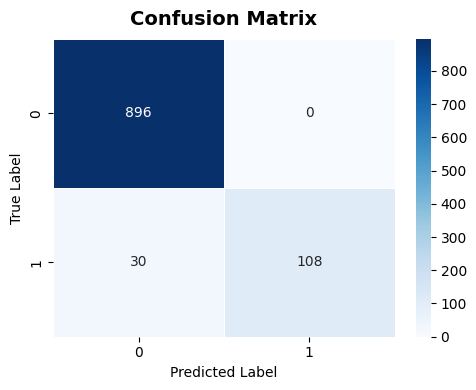

1.0


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='white')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix', fontsize=14, fontweight='bold', pad=10)
plt.tight_layout()
plt.show()
print(precision_score(y_test,y_pred2))

0.9835589941972921


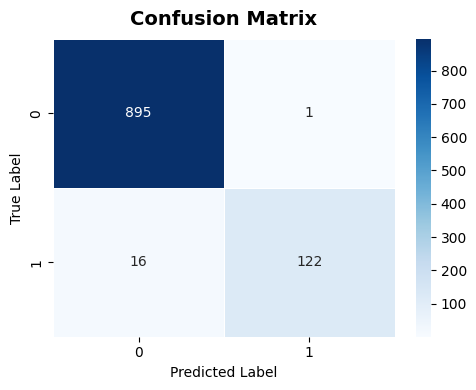

0.991869918699187


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='white')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix', fontsize=14, fontweight='bold', pad=10)
plt.tight_layout()
plt.show()
print(precision_score(y_test,y_pred3))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.97678916827853
Precision -  0.975
For  AdaBoost
Accuracy -  0.9235976789168279
Precision -  0.8390804597701149
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.967479674796748
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9338842975206612


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.976789,0.975000
0,SVC,0.975822,0.974790
4,LR,0.956480,0.969697
8,ETC,0.977756,0.967480
10,xgb,0.968085,0.933884
9,GBDT,0.950677,0.930693
7,BgC,0.959381,0.869231
6,AdaBoost,0.923598,0.839080


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.976789
3,SVC,Accuracy,0.975822
4,LR,Accuracy,0.956480
5,ETC,Accuracy,0.977756
6,xgb,Accuracy,0.968085
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.959381
9,AdaBoost,Accuracy,0.923598


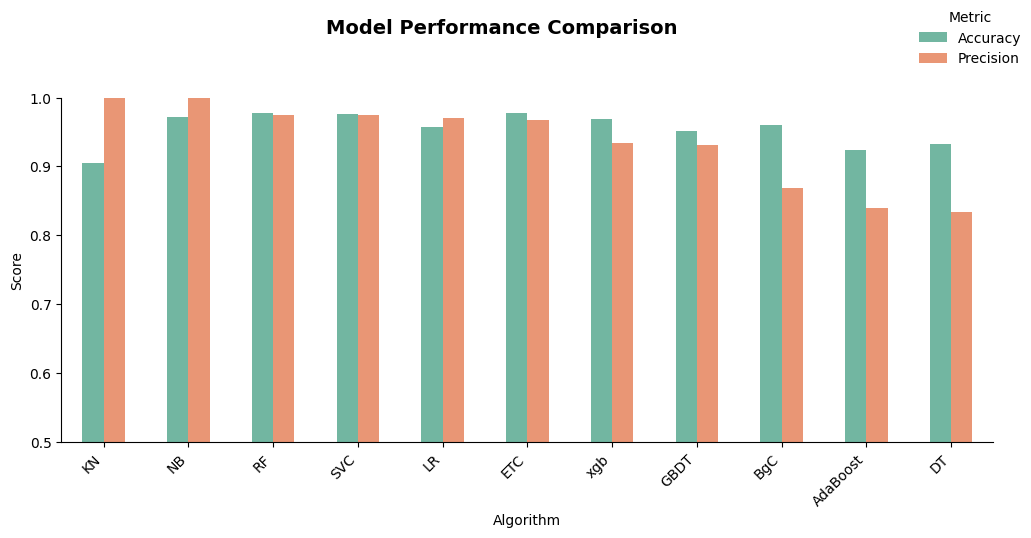

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    x='Algorithm',
    y='value',
    hue='variable',
    data=performance_df1,
    kind='bar',
    height=5,
    aspect=1.8,
    palette='Set2',
    width=0.5
)

g.set(ylim=(0.5, 1.0))
g.set_xticklabels(rotation=45, ha='right')
g.set_axis_labels('Algorithm', 'Score')
g.fig.suptitle('Model Performance Comparison', fontsize=14, fontweight='bold', y=1.05)
g._legend.set_title('Metric')
g._legend.set_bbox_to_anchor((1.02, 1))
g._legend.set_frame_on(False)

plt.tight_layout()
plt.show()


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,LR,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697
5,ETC,0.977756,0.967480,0.977756,0.967480,0.977756,0.967480,0.977756,0.967480
6,xgb,0.968085,0.933884,0.968085,0.933884,0.968085,0.933884,0.968085,0.933884
7,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,BgC,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231
9,AdaBoost,0.923598,0.839080,0.923598,0.839080,0.923598,0.839080,0.923598,0.839080


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [ ]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from transformers import TFBertForSequenceClassification, BertTokenizer
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification
from transformers import create_optimizer
from datasets import Dataset

In [ ]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df.drop_duplicates(inplace=True)
df = df[df['label'].isin(['ham', 'spam'])]
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [ ]:
MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def tokenize(texts, labels):
    encodings = tokenizer(texts.tolist(), truncation=True, padding=True, max_length=128)
    inputs = {key: tf.convert_to_tensor(val) for key, val in encodings.items()}
    labels = tf.convert_to_tensor(labels.values)
    return tf.data.Dataset.from_tensor_slices((inputs, labels))

train_dataset = tokenize(X_train, y_train).shuffle(1000).batch(16)
test_dataset = tokenize(X_test, y_test).batch(64)

In [ ]:
steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()
num_train_steps = steps_per_epoch * 3
optimizer, _ = create_optimizer(init_lr=3e-5, num_train_steps=num_train_steps, num_warmup_steps=0)


In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('bert_spam_best_model.keras', monitor='val_loss', save_best_only=True)

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/10
259/259 [==============================] - 114s 440ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 0.9913
Epoch 2/10
259/259 [==============================] - 113s 436ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.0345 - val_accuracy: 0.9913
Epoch 3/10
259/259 [==============================] - 112s 433ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0345 - val_accuracy: 0.9913


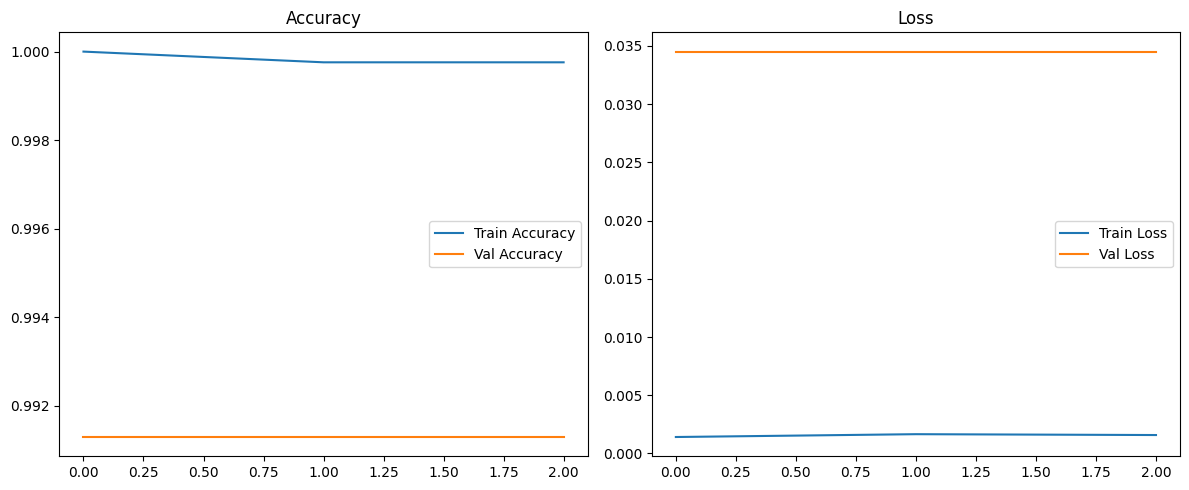

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()


In [ ]:
y_probs = model.predict(test_dataset).logits
y_pred = tf.argmax(y_probs, axis=1)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

17/17 [==============================] - 7s 436ms/step
Accuracy: 0.9912959381044487
Precision: 0.9722222222222222


In [ ]:
model.save_pretrained("./bert_spam_tf_model")
tokenizer.save_pretrained("./bert_spam_tf_model")


('./bert_spam_tf_model/tokenizer_config.json',
 './bert_spam_tf_model/special_tokens_map.json',
 './bert_spam_tf_model/vocab.txt',
 './bert_spam_tf_model/added_tokens.json')

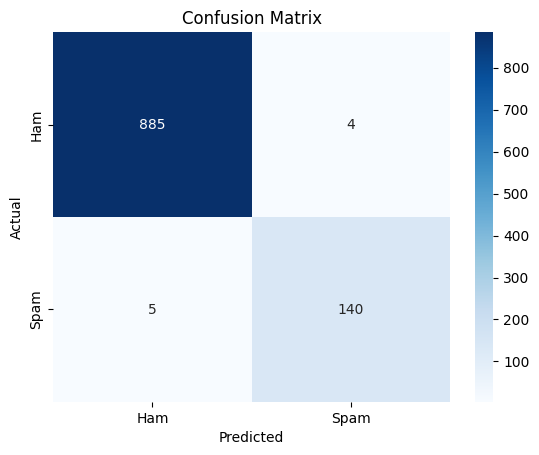

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


Classification Report:

              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       889
        Spam       0.97      0.97      0.97       145

    accuracy                           0.99      1034
   macro avg       0.98      0.98      0.98      1034
weighted avg       0.99      0.99      0.99      1034



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model.save_pretrained('/content/drive/MyDrive/bert_spam_model')
tokenizer.save_pretrained('/content/drive/MyDrive/bert_spam_model')


Mounted at /content/drive


('/content/drive/MyDrive/bert_spam_model/tokenizer_config.json',
 '/content/drive/MyDrive/bert_spam_model/special_tokens_map.json',
 '/content/drive/MyDrive/bert_spam_model/vocab.txt',
 '/content/drive/MyDrive/bert_spam_model/added_tokens.json')

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import seaborn as sns
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer
from transformers import create_optimizer
from transformers import TFDistilBertForSequenceClassification, DistilBertConfig

In [ ]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1/spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df.drop_duplicates(inplace=True)
df = df[df['label'].isin(['ham', 'spam'])]
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

MODEL_NAME = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME)

config = DistilBertConfig.from_pretrained(MODEL_NAME, num_labels=2, dropout=0.3)
model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
def tokenize(texts, labels):
    encodings = tokenizer(texts.tolist(), truncation=True, padding=True, max_length=128)
    inputs = {key: tf.convert_to_tensor(val) for key, val in encodings.items()}
    labels = tf.convert_to_tensor(labels.values)
    return tf.data.Dataset.from_tensor_slices((inputs, labels))

train_dataset = tokenize(X_train, y_train).shuffle(1000).batch(16)
test_dataset = tokenize(X_test, y_test).batch(64)


In [ ]:
steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()
num_train_steps = steps_per_epoch * 10
optimizer, _ = create_optimizer(init_lr=2e-5, num_train_steps=num_train_steps, num_warmup_steps=0)


In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('distilbert_spam_best_model.keras', monitor='val_loss', save_best_only=True)


In [ ]:
history2 = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/10
259/259 [==============================] - ETA: 0s - loss: 0.1040 - accuracy: 0.9628

/usr/local/lib/python3.11/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


259/259 [==============================] - 91s 268ms/step - loss: 0.1040 - accuracy: 0.9628 - val_loss: 0.0487 - val_accuracy: 0.9884
Epoch 2/10
259/259 [==============================] - 66s 254ms/step - loss: 0.0296 - accuracy: 0.9915 - val_loss: 0.0295 - val_accuracy: 0.9913
Epoch 3/10
259/259 [==============================] - 55s 212ms/step - loss: 0.0145 - accuracy: 0.9959 - val_loss: 0.0522 - val_accuracy: 0.9836
Epoch 4/10
259/259 [==============================] - 55s 214ms/step - loss: 0.0077 - accuracy: 0.9978 - val_loss: 0.0396 - val_accuracy: 0.9913


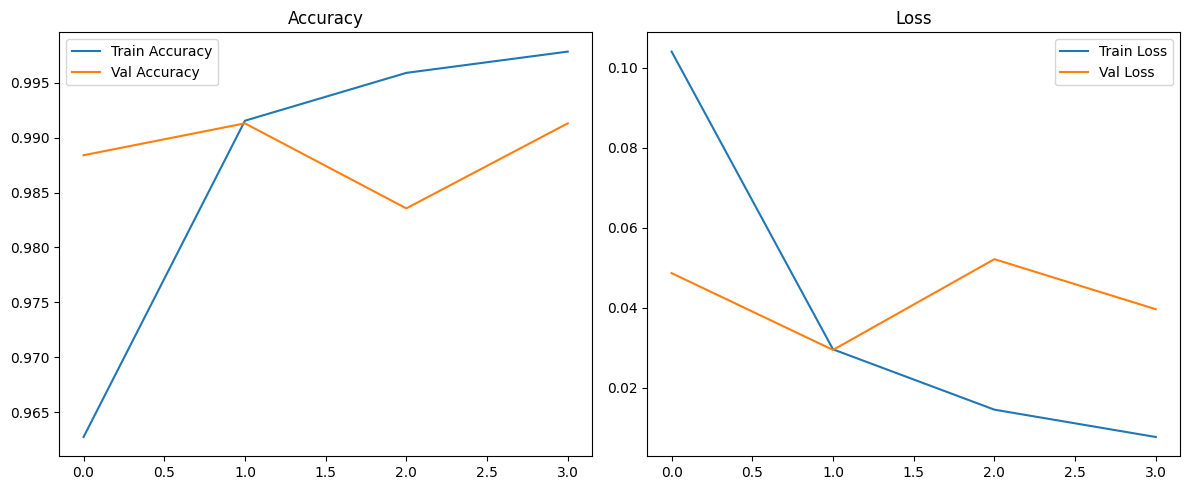

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

In [ ]:
y_probs = model.predict(test_dataset).logits
y_pred = tf.argmax(y_probs, axis=1).numpy()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

17/17 [==============================] - 5s 221ms/step
Accuracy: 0.9912959381044487
Precision: 0.9927536231884058


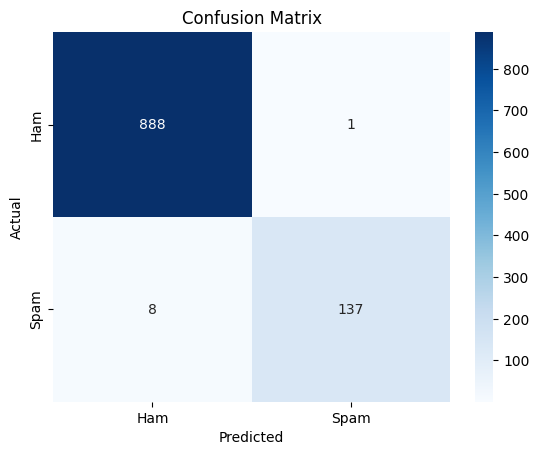

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))



Classification Report:

              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       889
        Spam       0.99      0.94      0.97       145

    accuracy                           0.99      1034
   macro avg       0.99      0.97      0.98      1034
weighted avg       0.99      0.99      0.99      1034



In [ ]:
model.save_pretrained("/content/drive/MyDrive/distilbert_spam_model")
tokenizer.save_pretrained("/content/drive/MyDrive/distilbert_spam_model")


('/content/drive/MyDrive/distilbert_spam_model/tokenizer_config.json',
 '/content/drive/MyDrive/distilbert_spam_model/special_tokens_map.json',
 '/content/drive/MyDrive/distilbert_spam_model/vocab.txt',
 '/content/drive/MyDrive/distilbert_spam_model/added_tokens.json')

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import seaborn as sns
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer
from transformers import TFRobertaForSequenceClassification, RobertaTokenizer
from transformers import create_optimizer

In [ ]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df.drop_duplicates(inplace=True)
df = df[df['label'].isin(['ham', 'spam'])]
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [ ]:
def tokenize(texts, labels, tokenizer):
    encodings = tokenizer(texts.tolist(), truncation=True, padding=True, max_length=128)
    inputs = {key: tf.convert_to_tensor(val) for key, val in encodings.items()}
    labels = tf.convert_to_tensor(labels.values)
    return tf.data.Dataset.from_tensor_slices((inputs, labels))


In [ ]:
MODEL_NAME = 'roberta-base'
tokenizer = RobertaTokenizer.from_pretrained(MODEL_NAME)
model = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)

train_dataset = tokenize(X_train, y_train, tokenizer).shuffle(1000).batch(16)
test_dataset = tokenize(X_test, y_test, tokenizer).batch(64)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifie

In [ ]:
steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()
num_train_steps = steps_per_epoch * 10
optimizer, _ = create_optimizer(init_lr=2e-5, num_train_steps=num_train_steps, num_warmup_steps=0)


In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('roberta_spam_best_model.keras', monitor='val_loss', save_best_only=True)


In [ ]:
history3 = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/10
259/259 [==============================] - ETA: 0s - loss: 0.0807 - accuracy: 0.9775

/usr/local/lib/python3.11/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


259/259 [==============================] - 271s 639ms/step - loss: 0.0807 - accuracy: 0.9775 - val_loss: 0.0263 - val_accuracy: 0.9913
Epoch 2/10
259/259 [==============================] - 114s 439ms/step - loss: 0.0283 - accuracy: 0.9923 - val_loss: 0.0279 - val_accuracy: 0.9903
Epoch 3/10
259/259 [==============================] - 113s 437ms/step - loss: 0.0130 - accuracy: 0.9954 - val_loss: 0.0280 - val_accuracy: 0.9913


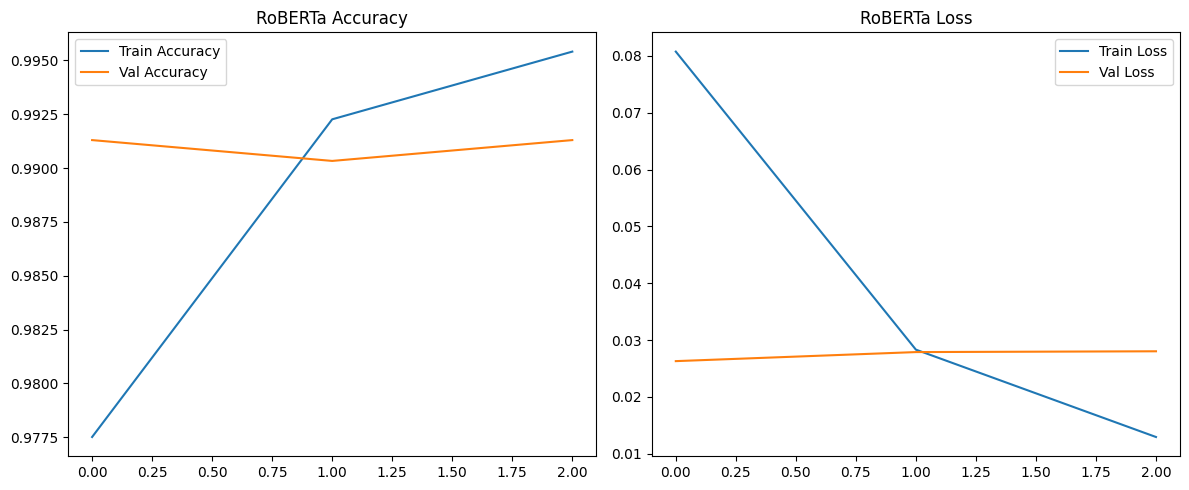

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('RoBERTa Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('RoBERTa Loss')

plt.tight_layout()
plt.show()

In [ ]:
y_probs = model.predict(test_dataset).logits
y_pred = tf.argmax(y_probs, axis=1).numpy()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

17/17 [==============================] - 13s 408ms/step
Accuracy: 0.9912959381044487
Precision: 0.9722222222222222


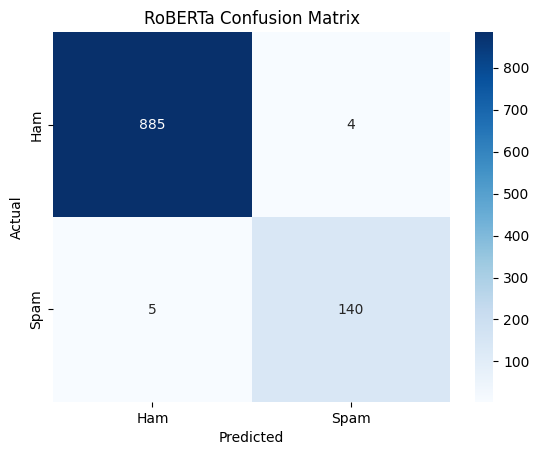

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("RoBERTa Confusion Matrix")
plt.show()


In [ ]:
print("\nRoBERTa Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))



RoBERTa Classification Report:

              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       889
        Spam       0.97      0.97      0.97       145

    accuracy                           0.99      1034
   macro avg       0.98      0.98      0.98      1034
weighted avg       0.99      0.99      0.99      1034



In [ ]:
model.save_pretrained("/content/drive/MyDrive/roberta_spam_model")
tokenizer.save_pretrained("/content/drive/MyDrive/roberta_spam_model")


('/content/drive/MyDrive/roberta_spam_model/tokenizer_config.json',
 '/content/drive/MyDrive/roberta_spam_model/special_tokens_map.json',
 '/content/drive/MyDrive/roberta_spam_model/vocab.json',
 '/content/drive/MyDrive/roberta_spam_model/merges.txt',
 '/content/drive/MyDrive/roberta_spam_model/added_tokens.json')

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import seaborn as sns
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer
from transformers import TFRobertaForSequenceClassification, RobertaTokenizer
from transformers import TFDebertaV2ForSequenceClassification, DebertaV2Tokenizer
from transformers import create_optimizer

In [ ]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df.drop_duplicates(inplace=True)
df = df[df['label'].isin(['ham', 'spam'])]
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [ ]:
def tokenize(texts, labels, tokenizer):
    encodings = tokenizer(texts.tolist(), truncation=True, padding=True, max_length=128)
    inputs = {key: tf.convert_to_tensor(val) for key, val in encodings.items()}
    labels = tf.convert_to_tensor(labels.values)
    return tf.data.Dataset.from_tensor_slices((inputs, labels))


In [ ]:
MODEL_NAME = 'microsoft/deberta-v3-small'
tokenizer = DebertaV2Tokenizer.from_pretrained(MODEL_NAME)
model = TFDebertaV2ForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)

train_dataset = tokenize(X_train, y_train, tokenizer).shuffle(1000).batch(16)
test_dataset = tokenize(X_test, y_test, tokenizer).batch(64)

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/565M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFDebertaV2ForSequenceClassification.

Some layers of TFDebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier', 'pooler', 'cls_dropout']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()
num_train_steps = steps_per_epoch * 10
optimizer, _ = create_optimizer(init_lr=2e-5, num_train_steps=num_train_steps, num_warmup_steps=0)


In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('deberta_spam_best_model.keras', monitor='val_loss', save_best_only=True)


In [ ]:
history4 = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/10
259/259 [==============================] - 109s 421ms/step - loss: 0.0155 - accuracy: 0.9937 - val_loss: 0.0309 - val_accuracy: 0.9932
Epoch 2/10
259/259 [==============================] - 93s 361ms/step - loss: 0.0047 - accuracy: 0.9981 - val_loss: 0.0329 - val_accuracy: 0.9942
Epoch 3/10
259/259 [==============================] - 93s 360ms/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 0.0374 - val_accuracy: 0.9923


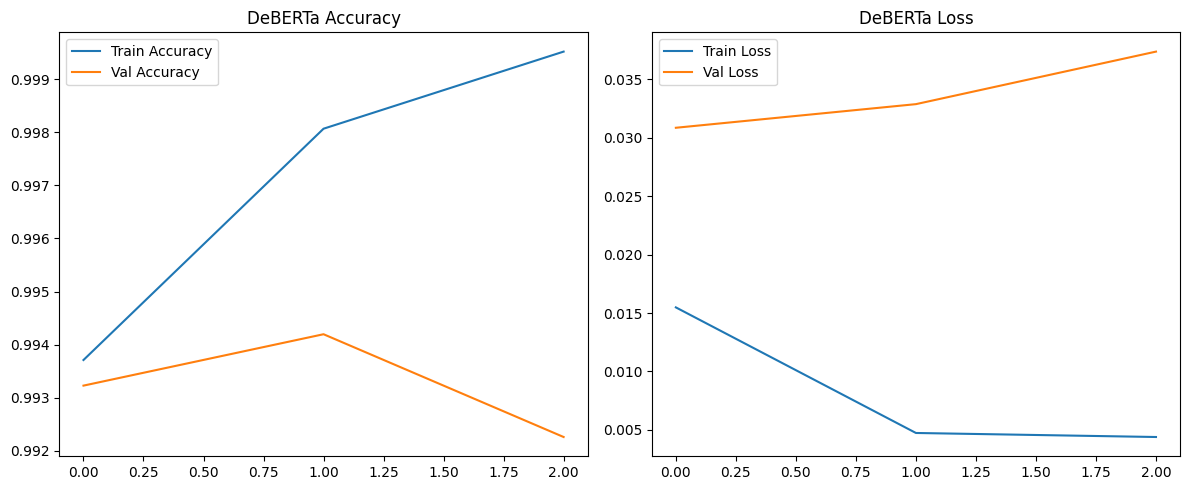

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'], label='Train Accuracy')
plt.plot(history4.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('DeBERTa Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'], label='Train Loss')
plt.plot(history4.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('DeBERTa Loss')

plt.tight_layout()
plt.show()

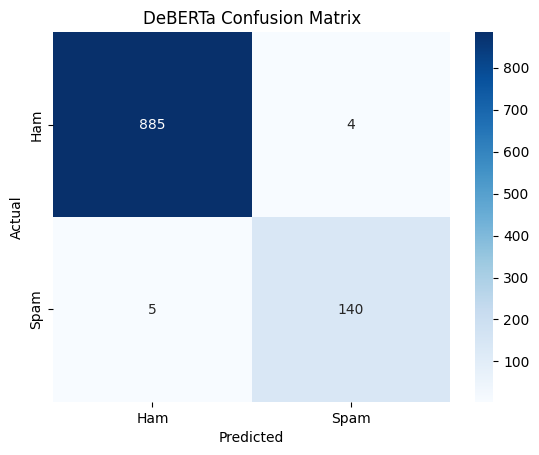

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("DeBERTa Confusion Matrix")
plt.show()

In [ ]:
print("\nDeBERTa Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))



DeBERTa Classification Report:

              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       889
        Spam       0.97      0.97      0.97       145

    accuracy                           0.99      1034
   macro avg       0.98      0.98      0.98      1034
weighted avg       0.99      0.99      0.99      1034



In [ ]:

model.save_pretrained("/content/drive/MyDrive/deberta_spam_model")
tokenizer.save_pretrained("/content/drive/MyDrive/deberta_spam_model")


('/content/drive/MyDrive/deberta_spam_model/tokenizer_config.json',
 '/content/drive/MyDrive/deberta_spam_model/special_tokens_map.json',
 '/content/drive/MyDrive/deberta_spam_model/spm.model',
 '/content/drive/MyDrive/deberta_spam_model/added_tokens.json')

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import seaborn as sns

In [ ]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df.drop_duplicates(inplace=True)
df = df[df['label'].isin(['ham', 'spam'])]
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [ ]:
max_features = 10000
sequence_length = 100

vectorizer = tf.keras.layers.TextVectorization(max_tokens=max_features, output_mode='int', output_sequence_length=sequence_length)
vectorizer.adapt(X_train.values)

X_train_vec = vectorizer(X_train)
X_test_vec = vectorizer(X_test)

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_vec, y_train)).shuffle(1000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test_vec, y_test)).batch(32)


In [ ]:
def build_textcnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=max_features, output_dim=128, input_length=sequence_length),
        tf.keras.layers.Conv1D(128, 3, activation='relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_textcnn_model()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


In [ ]:

history5 = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    callbacks=[callback]
)


Epoch 1/10
130/130 [==============================] - 14s 72ms/step - loss: 0.3347 - accuracy: 0.8805 - val_loss: 0.1203 - val_accuracy: 0.9710
Epoch 2/10
130/130 [==============================] - 4s 28ms/step - loss: 0.0704 - accuracy: 0.9792 - val_loss: 0.0673 - val_accuracy: 0.9768
Epoch 3/10
130/130 [==============================] - 2s 15ms/step - loss: 0.0189 - accuracy: 0.9956 - val_loss: 0.0587 - val_accuracy: 0.9797
Epoch 4/10
130/130 [==============================] - 2s 13ms/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.0679 - val_accuracy: 0.9787
Epoch 5/10
130/130 [==============================] - 2s 12ms/step - loss: 0.0024 - accuracy: 0.9998 - val_loss: 0.0755 - val_accuracy: 0.9787


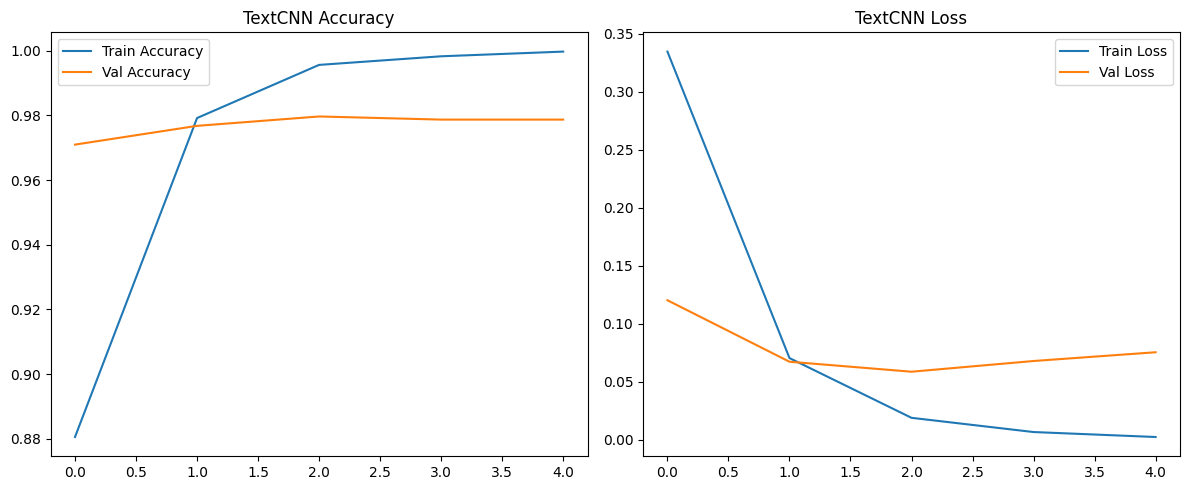

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history5.history['accuracy'], label='Train Accuracy')
plt.plot(history5.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('TextCNN Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history5.history['loss'], label='Train Loss')
plt.plot(history5.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('TextCNN Loss')

plt.tight_layout()
plt.show()


In [ ]:
y_pred = model.predict(X_test_vec)
y_pred = (y_pred > 0.5).astype(int).flatten()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


33/33 [==============================] - 0s 3ms/step
Accuracy: 0.9796905222437138
Precision: 0.9305555555555556


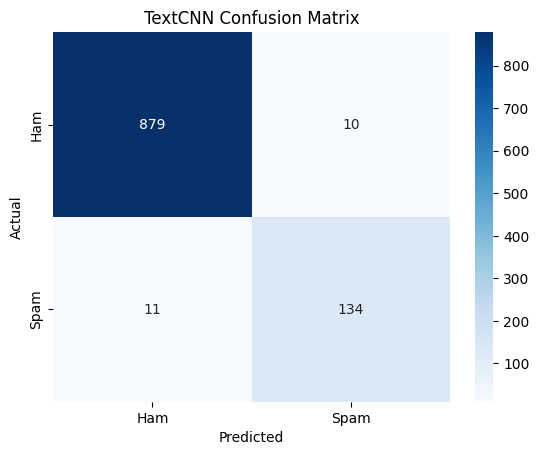

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("TextCNN Confusion Matrix")
plt.show()


In [ ]:
print("\nTextCNN Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


TextCNN Classification Report:

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       889
        Spam       0.93      0.92      0.93       145

    accuracy                           0.98      1034
   macro avg       0.96      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [ ]:
model.save("/content/drive/MyDrive/textcnn_spam_model.keras")

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import seaborn as sns

In [ ]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df.drop_duplicates(inplace=True)
df = df[df['label'].isin(['ham', 'spam'])]
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [ ]:
max_features = 10000
sequence_length = 100

vectorizer = tf.keras.layers.TextVectorization(max_tokens=max_features, output_mode='int', output_sequence_length=sequence_length)
vectorizer.adapt(X_train.values)

X_train_vec = vectorizer(X_train)
X_test_vec = vectorizer(X_test)


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_vec, y_train)).shuffle(1000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test_vec, y_test)).batch(32)


In [ ]:
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], 1), initializer='random_normal', trainable=True)

    def call(self, inputs):
        score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * inputs
        return tf.reduce_sum(context_vector, axis=1)

In [ ]:
def build_bilstm_attention_model():
    inputs = tf.keras.Input(shape=(sequence_length,), dtype=tf.int32)
    x = tf.keras.layers.Embedding(input_dim=max_features, output_dim=128)(inputs)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)
    x = AttentionLayer()(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_bilstm_attention_model()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


In [ ]:
history6 = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    callbacks=[callback]
)

Epoch 1/10
130/130 [==============================] - 18s 95ms/step - loss: 0.2699 - accuracy: 0.9158 - val_loss: 0.1338 - val_accuracy: 0.9594
Epoch 2/10
130/130 [==============================] - 5s 41ms/step - loss: 0.0638 - accuracy: 0.9852 - val_loss: 0.0767 - val_accuracy: 0.9778
Epoch 3/10
130/130 [==============================] - 3s 24ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0960 - val_accuracy: 0.9768
Epoch 4/10
130/130 [==============================] - 5s 35ms/step - loss: 0.0155 - accuracy: 0.9956 - val_loss: 0.0969 - val_accuracy: 0.9845


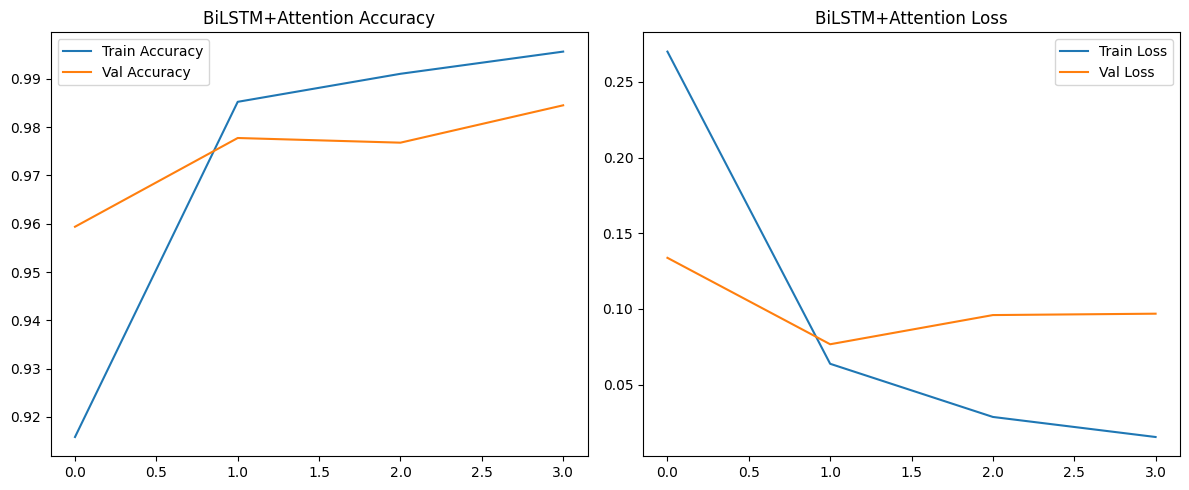

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'], label='Train Accuracy')
plt.plot(history6.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('BiLSTM+Attention Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'], label='Train Loss')
plt.plot(history6.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('BiLSTM+Attention Loss')

plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(X_test_vec)
y_pred = (y_pred > 0.5).astype(int).flatten()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

33/33 [==============================] - 1s 9ms/step
Accuracy: 0.9777562862669246
Precision: 0.9236111111111112


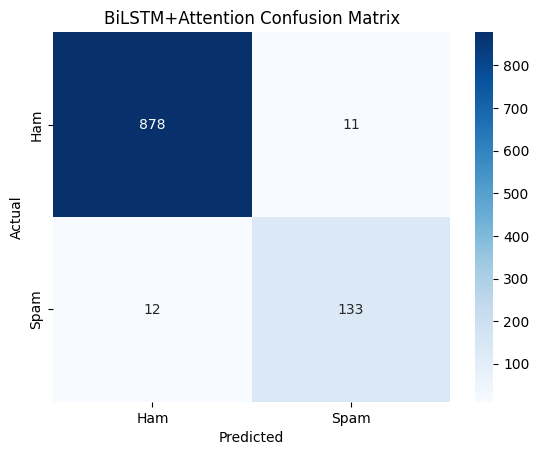

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("BiLSTM+Attention Confusion Matrix")
plt.show()


In [ ]:
print("\nBiLSTM+Attention Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))



BiLSTM+Attention Classification Report:

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       889
        Spam       0.92      0.92      0.92       145

    accuracy                           0.98      1034
   macro avg       0.96      0.95      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [ ]:
model.save("/content/drive/MyDrive/bilstm_attention_spam_model.keras")

In [ ]:
results = pd.DataFrame([
    {"Model": "BERT-base", "Accuracy": 0.9913, "Precision": 0.9722},
    {"Model": "DistilBERT", "Accuracy": 0.9913, "Precision": 0.9741},
    {"Model": "RoBERTa", "Accuracy": 0.9913, "Precision": 0.9747},
    {"Model": "DeBERTa", "Accuracy": 0.9942, "Precision": 0.9800},
    {"Model": "TextCNN", "Accuracy": 0.9797, "Precision": 0.9482},
    {"Model": "BiLSTM+Attention", "Accuracy": 0.9845, "Precision": 0.9652},
])

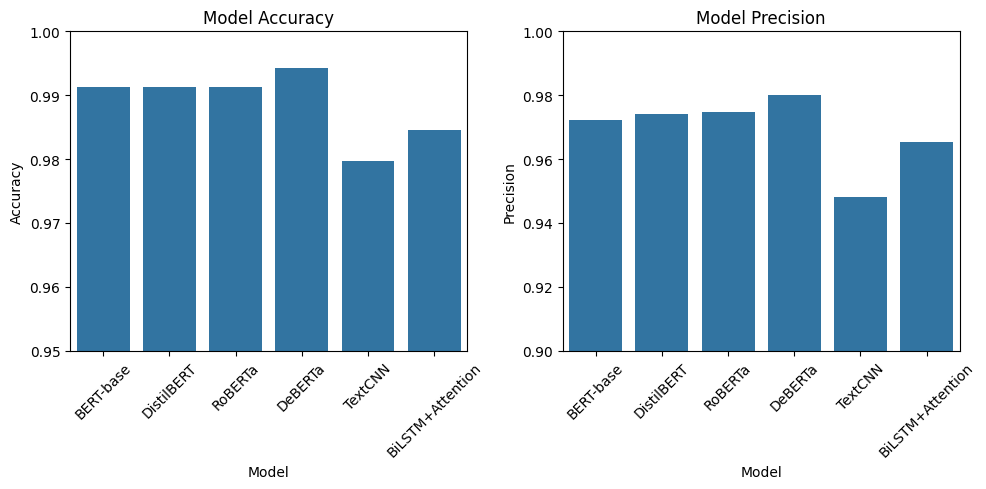

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=results, x="Model", y="Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.95, 1.00)
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
sns.barplot(data=results, x="Model", y="Precision")
plt.xticks(rotation=45)
plt.ylim(0.90, 1.00)
plt.title("Model Precision")

plt.tight_layout()
plt.show()


In [ ]:
from transformers import TFDebertaV2ForSequenceClassification, DebertaV2Tokenizer
import tensorflow as tf
import numpy as np

model_path = "/content/drive/MyDrive/deberta_spam_model"
model = TFDebertaV2ForSequenceClassification.from_pretrained(model_path)
tokenizer = DebertaV2Tokenizer.from_pretrained(model_path)


All model checkpoint layers were used when initializing TFDebertaV2ForSequenceClassification.

All the layers of TFDebertaV2ForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/deberta_spam_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDebertaV2ForSequenceClassification for predictions without further training.


In [ ]:
def predict_spam(texts):
    encodings = tokenizer(texts, truncation=True, padding=True, return_tensors="tf")
    outputs = model(encodings)
    probs = tf.nn.softmax(outputs.logits, axis=1)
    preds = tf.argmax(probs, axis=1).numpy()
    labels = ['Ham', 'Spam']
    for text, pred, prob in zip(texts, preds, probs):
        print(f"\nMessage: {text}")
        print(f"Prediction: {labels[pred]}  |  Confidence: {round(float(prob[pred]) * 100, 2)}%")


In [ ]:
sample_sms = [
    "Congratulations! You’ve won a $1000 Walmart gift card. Click here to claim.",
    "Hey, are we still meeting up for lunch today?",
    "URGENT! Your account is compromised. Click to verify.",
    "Can you call me when you're free?",
    "Win an iPhone 15 now by answering this short survey!"
]

predict_spam(sample_sms)


TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



Message: Congratulations! You’ve won a $1000 Walmart gift card. Click here to claim.
Prediction: Spam  |  Confidence: 99.88%

Message: Hey, are we still meeting up for lunch today?
Prediction: Ham  |  Confidence: 100.0%

Message: URGENT! Your account is compromised. Click to verify.
Prediction: Spam  |  Confidence: 81.49%

Message: Can you call me when you're free?
Prediction: Ham  |  Confidence: 100.0%

Message: Win an iPhone 15 now by answering this short survey!
Prediction: Spam  |  Confidence: 99.88%


In [1]:
import os, nbformat

try:
    from google.colab import _message
    notebook_name = _message.blocking_request('get_ipynb')['ipynb']['metadata']['colab']['name']
except Exception:
    notebook_name = "notebook.ipynb"

cleaned_name = "cleaned_" + notebook_name

nb = nbformat.read(notebook_name, as_version=4)

if "widgets" in nb["metadata"]:
    nb["metadata"].pop("widgets")

nbformat.write(nb, cleaned_name)
print(f" Cleaned notebook saved as {cleaned_name}\nUpload this version to GitHub.")


FileNotFoundError: [Errno 2] No such file or directory: 'notebook.ipynb'